# Project 7: Statistical Analysis and Hypothesis Testing

Project : Increasing YoY revenue from game purchases by increasing retention rate of gamers

About the project: 
    The project involves working on data related to Cookie Cats – a hugely popular puzzle game. As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in the player's enjoyment of the game being increased and prolonged. But where should the gates be placed and how the placement of the gates can retain the players for more time.
The project requires you to:
    Perform exploratory data analysis of the given datasets and generate their statistical summary.
    Perform A/B testing between the two groups of data  to analyze the impact on player retention if the first gate in Cookie Cats is moved from level 30 to level 40.

Aim: Even though the overall subscription for the game is growing, the revenue from in-game purchases has been declining and many players are uninstalling the game after playing for a few days. What recommendations can you suggest increasing the in-game purchase and retaining the players?

Objectives/Exercise:
The overall objective of the project is to test the company’s CEO’s hypothesis that moving the first gate from level 30 to level 40 increases retention rate and the number of game rounds played. The CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait before they can proceed further in the game.
In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players i.e.,
group A would encounter the gate at level 30, and
group B would encounter the gate at level 40

To achieve the overall objectives, this work plan can help:

1. Perform initial data preparation.
2. Generate statistical summary and plot charts to answer:
3. What is the overall 7-day retention rate of the game?
4. How many players never played the game after installing it?
5. Does the number of players decrease as the levels become difficult?
6. Generate crosstab for two player groups to understand the difference in the 1-day and 7-days retention rate and total number of game rounds played.
7. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played. Here, you can:
8. Check the assumptions of two sample test:
             i.      Normal distribution – Apply Shapiro test
            ii.      Homogeneity of variance – Apply Levene’s test
9. Apply the relevant two sample significance test method based on the results from the tests for normality and homogeneity
10. Analyze the significance of the test results and decide which level has more advantage in terms of player retention?

Use bootstrap resampling to plot retention rate distribution for both groups to visualize the effect of different versions of the game on retention.


VIP@AINEAI

Solution by Tejaswini J

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro,levene
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [2]:
#Read data using pandas
user_df=pd.read_csv( "cookie_cats.csv" )

#Check data types of each column using "dtypes" function
print( "Data types for the data set:" )
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print( "Shape of the data i.e. no. of rows and columns" )
user_df.shape

#display first 5 rows of the data using "head" function
print( "First 5 rows of the raw data:" )
user_df.head( 5 )

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [3]:
#Check for any missing values in the data using isnull() function
print( "COL NULLs:\n", user_df.isnull().sum() )#Column wise Null
print( "Total NULLS in dataset", user_df.isnull().sum().sum() ) # Total NULLs

print( "Count of Unique IDs: ", user_df.userid.nunique() )

COL NULLs:
 userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64
Total NULLS in dataset 0
Count of Unique IDs:  90189


### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

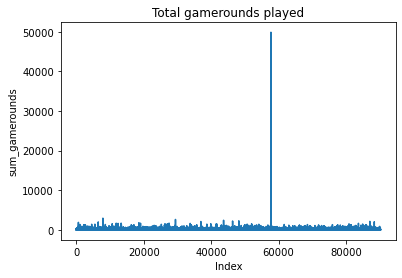

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title( "Total gamerounds played" )
plt.xlabel( "Index" ) #Row Number
plt.ylabel( "sum_gamerounds" ) #Column = Sum of Game Rounds.
plt.plot( user_df.sum_gamerounds )

In [5]:
#Based on the plot, filter out the outlier from sum_gamerounds played; 
#Use max() fucntion to find the index of the outlier

#First find the Max value of Game Rounds:
print(" Maximum Value of Sum_GameRounds Column: ", max( user_df.sum_gamerounds ) )

idx_val = user_df[ user_df.sum_gamerounds.isin( [ max( user_df.sum_gamerounds ) ] ) ].index.tolist()

user_df.drop( user_df.index[ idx_val ], inplace = True )

user_df

 Maximum Value of Sum_GameRounds Column:  49854


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

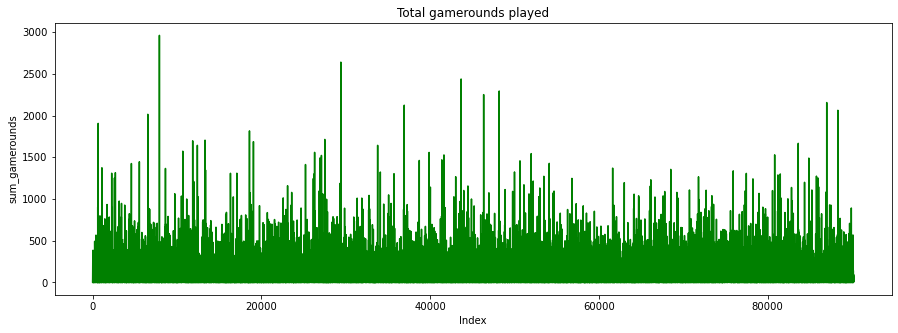

In [6]:
#Plot the graph for sum_gamerounds player after removing the outlier
plt.figure( figsize = ( 15, 5 ) ) 
plt.title( "Total gamerounds played" )
plt.xlabel( "Index" ) #Row Number
plt.ylabel( "sum_gamerounds" ) #Column = Sum of Game Rounds.
plt.plot( user_df.sum_gamerounds, color = 'green' )

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [7]:
#Insert calculation for 7-day retention rate

retention_rate_7 =  round( ( ( user_df.retention_7.sum() / user_df.shape[ 0 ] ) * 100), 2 ) #2decimal points
print( "Overal 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%" )

Overal 7 days retention rate of the game for both versions is:  18.61 %


### Q2.2 How many players never played the game after installing? 

In [8]:
# Find number of customers with sum_gamerounds is equal to zero

player_no_play = user_df[ user_df.sum_gamerounds == 0 ].shape[ 0 ]
print( "The number of users who didn't play after installing the game = ", player_no_play )

The number of users who didn't play after installing the game =  3994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Sum_GameRounds')

Text(0, 0.5, 'Count Players')

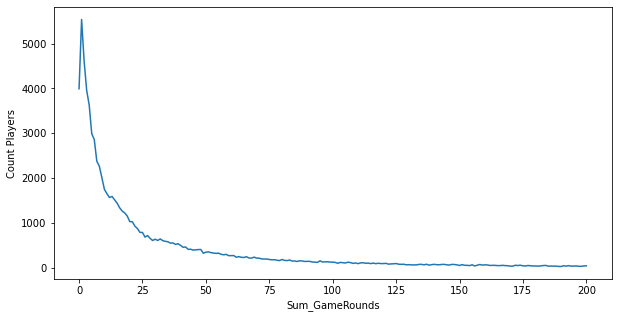

In [9]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart

new_df = user_df[ ["userid", "sum_gamerounds"] ].groupby( "sum_gamerounds" ).count().reset_index().rename( columns = {"userid": "count"} )[0:201]
plt.figure( figsize = ( 10, 5 ) )
plt.xlabel( "Sum_GameRounds" )
plt.ylabel( "Count Players" )
plt.plot( new_df[ "sum_gamerounds" ], new_df[ "count" ] )

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [10]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab( user_df.version, user_df.retention_7 ).apply( lambda r: r/r.sum(), axis=1 )

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


In [11]:
pd.crosstab( user_df.version, user_df.retention_1 ).apply( lambda r: r/r.sum(), axis=1 )

retention_1,False,True
version,,
gate_30,0.551802,0.448198
gate_40,0.557717,0.442283


<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above:
    
    ANSWER:
    1. There is slight difference between the two versions. We can statistically validate the same.
    
    2. The majority People of both versions of the game stop playing after 7 days.
    
    3. About 55% of the players in both versions stopped playing the game the next day after installation.

### Q3.2 Gamerounds summary for different game versions

In [12]:
#use pandas group by to calculate average game rounds played summarized by different versions
user_df[ [ "version","sum_gamerounds" ] ].groupby( "version" ).agg( "mean" )

,sum_gamerounds
version,
gate_30,51.342111
gate_40,51.298776


<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    
    ANSWER: The difference between the two versions are minimal/negligible.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [13]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")

user_df[ "version" ] = user_df[ "version" ].replace( [ "gate_30", "gate_40" ], [ "A","B" ] )

group_A = pd.DataFrame( user_df[ user_df.version=="A" ][ 'sum_gamerounds' ] )
group_B = pd.DataFrame( user_df[ user_df.version=="B" ][ 'sum_gamerounds' ] )

### Q4.1 Shapiro test of Normality

In [14]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro( group_A )

#test for group_B
shapiro( group_B )

#if P_Value (level of Significance) < 0.05 (5%), then we accept the Alternate Null Hypothesis.

ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

ShapiroResult(statistic=0.48256540298461914, pvalue=0.0)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?
    
    ANSWER: Since the p_value = 0, the Alternate Hypothesis is true, Distribution is NOT Normal.

### Q4.2 Test of homegienity of variance

In [15]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

levene( group_A.sum_gamerounds, group_B.sum_gamerounds )

LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
    
    ANSWER: p_value suggests that we fail to reject the null hypothesis hence, the two groups have equal variance.

### Q4.3 Test of significance: Two sample test

(array([4.3322e+04, 1.1220e+03, 1.8800e+02, 3.6000e+01, 1.9000e+01,
        7.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  296.1,  592.2,  888.3, 1184.4, 1480.5, 1776.6, 2072.7,
        2368.8, 2664.9, 2961. ]),
 <BarContainer object of 10 artists>)

(array([4.3785e+04, 1.3320e+03, 2.4900e+02, 7.1000e+01, 3.0000e+01,
        1.1000e+01, 6.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([   0.,  264.,  528.,  792., 1056., 1320., 1584., 1848., 2112.,
        2376., 2640.]),
 <BarContainer object of 10 artists>)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.97455423878383)

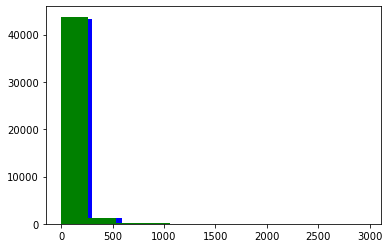

In [16]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis
plt.hist( group_A, color = 'blue' )
plt.hist( group_B, color = 'green' )

stats.mannwhitneyu( group_A.sum_gamerounds, group_B.sum_gamerounds, alternative = "less" )

#stats.mannwhitneyu( group_A.sum_gamerounds, group_B.sum_gamerounds, alternative = "greater" )

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing
    
    ANSWER: The two groups are statistically different.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [17]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function

user_df[ [ "version","retention_1", "retention_7" ] ].groupby( "version" ).agg( "mean" )


,retention_1,retention_7
version,,
A,0.448198,0.190183
B,0.442283,0.182000


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40
    
    ANSWER: Based on the Significance test, we can conclude that: (Version_A)Gate 30 has a higher rentention rate than (Version_B)Gate 40.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'retantion rate')

Text(0, 0.5, 'number of sample')

Text(0.5, 1.0, '1 day retention rate distribution')

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'retantion rate')

Text(0.5, 1.0, '7 days retention rate distribution')

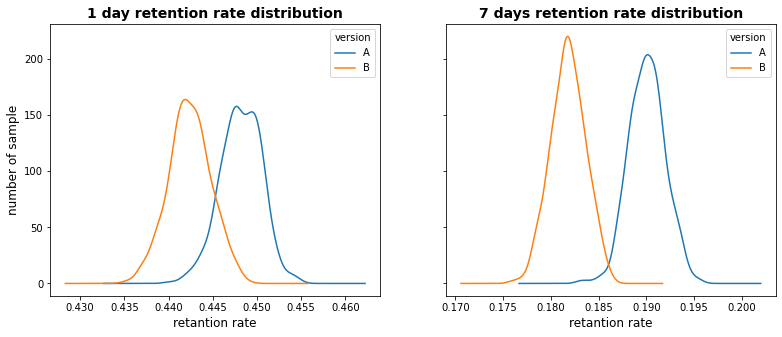

In [19]:
#Split the data into samples of groups - Ret_day_1 and Ret_Day_7.
reten_1d = []
reten_7d = []
for i in range(500):
    reten_mean_1 = user_df.sample( frac = 1, replace = True ).groupby( 'version' )[ 'retention_1' ].mean()
    reten_mean_7 = user_df.sample( frac = 1, replace = True).groupby( 'version' )[ 'retention_7' ].mean()
    reten_1d.append( reten_mean_1 )
    reten_7d.append( reten_mean_7 )
    
# Transforming the list to a DataFrame
reten_1d = pd.DataFrame( reten_1d )
reten_7d = pd.DataFrame( reten_7d )

# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1, ax2) = plt.subplots( 1, 2, sharey = True, figsize =( 13, 5 ) )

reten_1d.plot.kde( ax = ax1 )
ax1.set_xlabel( "retantion rate", size = 12 )
ax1.set_ylabel( "number of sample", size = 12 )
ax1.set_title( "1 day retention rate distribution", fontweight = "bold", size = 14 )

reten_7d.plot.kde( ax = ax2 )
ax2.set_xlabel( "retantion rate", size = 12 )
ax2.set_title( "7 days retention rate distribution", fontweight = "bold", size = 14 )
plt.show()

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, '% difference')

Text(0, 0.5, '% density')

Text(0.5, 1.0, 'Difference in retention \n between the two A/B groups')

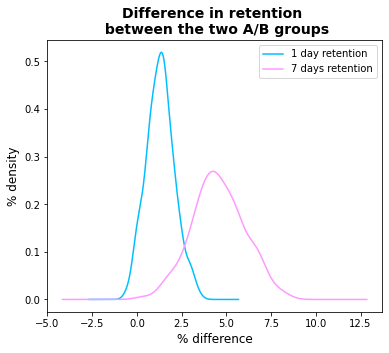

In [21]:
reten_1d[ 'diff' ] = ( ( reten_1d[ 'A' ] - reten_1d[ 'B' ] ) / reten_1d[ 'B' ] * 100 )
reten_7d[ 'diff' ] = ( ( reten_7d[ 'A' ] - reten_7d[ 'B' ] ) / reten_7d[ 'B' ] * 100 )

# Ploting the bootstrap % difference
fig, ( ax1 ) = plt.subplots(1, 1,figsize = ( 6, 5 ) )

reten_1d[ 'diff' ].plot.kde( ax = ax1, c = "#00bfff", label = "1 day retention" )
reten_7d[ 'diff' ].plot.kde( ax = ax1, c = "#ff99ff", label = "7 days retention" )
ax1.set_xlabel( "% difference",size = 12 )
ax1.set_ylabel( "% density",size = 12 )
ax1.set_title( "Difference in retention \n between the two A/B groups", fontweight = "bold", size = 14)
plt.legend()
plt.show()

From these chart, we can see that the most likely percentage difference is around 1% - 2% for 1-day retention. For 7-days retention the most likely difference is around 2% - 5%. Moreover, the most of the distribution is above 0%, in favor of a gate at level 30.

In [22]:
#the probability that 1-day retention is greater when the gate is at level 30
prob_1 = ( reten_1d[ 'diff' ] > 0 ).sum()/len( reten_1d[ 'diff' ] )

#the probability that 7-days retention is greater when the gate is at level 30
prob_7 = ( reten_7d[ 'diff' ] > 0 ).sum()/len( reten_7d[ 'diff' ] )

# Pretty printing the probability
print( f"The probability that 1-day retention is greater when the gate is at level 30: { ( prob_1 ) * 100 }% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: { ( prob_7 ) * 100 }% ")

The probability that 1-day retention is greater when the gate is at level 30: 95.19999999999999%       
The probability that 7-days retention is greater when the gate is at level 30: 100.0% 


If we want to keep retention high for both 1-day and 7-day retention, we should not move the gate from level 30 to level 40.